# Optimizing XGBoost parameters with all features of the prepared files

In [25]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklift.models import ClassTransformation
from sklift import metrics
from sklift.viz import plot_qini_curve
import chime

In [4]:
%load_ext chime

The chime extension is already loaded. To reload it, use:
  %reload_ext chime


In [5]:
clients = pd.read_csv('clients_train_modified.csv', index_col='client_id')
clients

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00,17383,17535,45.000000,0,0,0
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00,17266,17279,72.000000,1,0,0
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18,17347,17771,33.000000,1,0,0
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61,17497,17541,73.000000,0,0,0
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57,17509,17808,46.379533,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63,17343,17797,47.000000,0,1,0
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51,17312,17578,31.000000,0,0,0
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53,17582,17712,48.000000,1,0,0


In [6]:
x_cols = clients.columns

In [7]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients, how='left')
df_full

,treatment_flg,purchased,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,,,
ad6561e2d8,1,1,2.432500,97.3,0.000000,0.0,-1.600000,-64.0,0.000000,0.0,270.035250,10801.41,17503,17674,50.0,1,0,0
7c1ccbf93f,1,1,4.700000,9.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,425.500000,851.00,17480,17584,24.0,1,0,0
b58fadcab6,1,1,2.772727,91.5,0.000000,0.0,-9.363636,-309.0,0.000000,0.0,429.447576,14171.77,17472,17789,36.0,0,0,0
e99e6fabb9,0,0,1.046154,13.6,0.000000,0.0,0.000000,0.0,0.000000,0.0,220.923077,2872.00,17667,17681,79.0,1,0,0
27fb6f8520,1,1,2.740000,82.2,0.666667,20.0,-0.133333,-4.0,-1.666667,-50.0,329.540333,9886.21,17364,17515,34.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,1,1,8.625000,34.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,744.500000,2978.00,17835,17992,72.0,0,0,0
f634deea4e,0,1,1.086792,57.6,0.000000,0.0,-1.754717,-93.0,0.000000,0.0,199.038302,10549.03,17566,17602,35.0,0,0,0
16cb4f99b0,0,1,3.485714,24.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,448.571429,3140.00,17585,18047,50.0,1,0,0


In [8]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [9]:
indices_train.shape

(112021,)

In [10]:
indices_val.shape

(28006,)

In [11]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
fd1ab717e8,3.008333,108.3,0.0,0.0,0.000000,0.0,0.0,0.0,242.555556,8732.00,17774,17977,69.0,1,0,0
5be3f83065,9.935714,139.1,0.0,0.0,0.000000,0.0,0.0,0.0,716.005000,10024.07,17918,18036,67.0,1,0,0
1c48fc99b2,2.130909,117.2,0.0,0.0,-2.200000,-121.0,0.0,0.0,332.561455,18290.88,17319,17359,58.0,1,0,0
fcce9d3197,2.244186,96.5,0.0,0.0,-3.674419,-158.0,0.0,0.0,337.497674,14512.40,17370,17387,43.0,0,0,0
4f43f48cb7,9.603448,278.5,0.0,0.0,-15.482759,-449.0,0.0,0.0,843.710000,24467.59,17385,17842,42.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5792264c8,3.957143,83.1,0.0,0.0,0.000000,0.0,0.0,0.0,493.714286,10368.00,17424,17548,66.0,0,0,0
84880145bd,5.951724,172.6,0.0,0.0,-5.448276,-158.0,0.0,0.0,475.486897,13789.12,17895,17929,35.0,0,1,0
49eb365a88,3.845000,76.9,0.0,0.0,-8.250000,-165.0,0.0,0.0,416.533000,8330.66,17323,17566,20.0,0,1,0


In [12]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [13]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [14]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
c0582c1d5e,1.541379,44.7,0.0,0.0,-4.655172,-135.0,0.000000,0.0,251.534138,7294.49,17570,17748,56.0,0,0,0
9a96a00f1d,21.791667,523.0,0.0,0.0,-14.458333,-347.0,0.000000,0.0,2032.984583,48791.63,17369,17482,64.0,1,0,0
55bca71943,10.300000,30.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1131.100000,3393.30,17641,18220,32.0,0,0,1
5bb5a27171,3.067647,104.3,0.0,0.0,-10.147059,-345.0,0.000000,0.0,310.026176,10540.89,17353,17426,41.0,1,0,0
d9c7b97fba,3.116667,74.8,0.0,0.0,-5.750000,-138.0,0.000000,0.0,419.673333,10072.16,17323,17933,42.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f68c84f07b,2.416667,43.5,0.0,0.0,0.000000,0.0,0.000000,0.0,405.675556,7302.16,17847,18220,19.0,0,1,1
704cff2628,1.088889,9.8,0.0,0.0,-0.444444,-4.0,-3.333333,-30.0,216.888889,1952.00,17529,17643,42.0,0,0,0
feff930002,1.913333,57.4,0.0,0.0,-5.233333,-157.0,0.000000,0.0,308.957667,9268.73,17371,17583,29.0,1,0,0


In [15]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [16]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

## 1st optimization round

In [41]:
estimator = XGBClassifier(random_state=8, 
                          use_label_encoder=False)

In [42]:
model = ClassTransformation(estimator = estimator)

In [43]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [44]:
params = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.1, 0.3, 0.5],
    'estimator__max_depth': [2, 4, 6],
    'estimator__reg_alpha': [0, 0.1],
    'estimator__reg_lambda': [0, 0.1]
}

In [45]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [46]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[19:36:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:36:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:36:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:36:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.0s
[19:36:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[19:36:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.026 total time=   0.8s
[19:36:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.028 total time=   0.9s
[19:36:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   0.8s
[19:36:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.026 total time=   0.8s
[19:36:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   0.8s
[19:36:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:36:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:36:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:36:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[19:36:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[19:36:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   0.8s
[19:36:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.027 total time=   0.8s
[19:36:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   0.8s
[19:36:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   0.8s
[19:37:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   0.8s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:37:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.8s
[19:37:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.6s
[19:37:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.5s
[19:37:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.5s
[19:37:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.6s
[19:37:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.026 total time=   1.5s
[19:37:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.026 total time=   1.5s
[19:37:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   1.6s
[19:37:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.024 total time=   1.5s
[19:37:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   1.6s
[19:37:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.026 total time=   1.6s
[19:37:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.026 total time=   1.6s
[19:37:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:37:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.024 total time=   1.5s
[19:37:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.024 total time=   1.6s
[19:37:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.026 total time=   1.5s
[19:37:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.027 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:37:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   1.7s
[19:37:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   1.5s
[19:37:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   1.5s
[19:37:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   2.8s
[19:37:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.8s
[19:37:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   2.8s
[19:37:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   2.8s
[19:37:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.8s
[19:37:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.027 total time=   3.0s
[19:37:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.024 total time=   2.8s
[19:37:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   2.8s
[19:37:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   2.8s
[19:37:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.023 total time=   2.8s
[19:38:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.025 total time=   2.9s
[19:38:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.023 total time=   2.8s
[19:38:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   2.9s
[19:38:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   2.9s
[19:38:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.023 total time=   2.9s
[19:38:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   3.0s
[19:38:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.024 total time=   3.0s
[19:38:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   2.9s
[19:38:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   3.0s
[19:38:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   2.9s
[19:38:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.5s
[19:38:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   1.6s
[19:38:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:38:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:38:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:38:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.024 total time=   1.6s
[19:38:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   1.6s
[19:38:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.023 total time=   1.6s
[19:38:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   1.6s
[19:38:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   1.6s
[19:38:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:38:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.025 total time=   1.6s
[19:38:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:38:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:38:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   1.5s
[19:38:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.024 total time=   1.6s
[19:38:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.029 total time=   1.5s
[19:38:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   1.6s
[19:38:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   1.5s
[19:39:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   1.5s
[19:39:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.8s
[19:39:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.8s
[19:39:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   2.9s
[19:39:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   2.8s
[19:39:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.9s
[19:39:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   2.8s
[19:39:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   2.8s
[19:39:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   2.9s
[19:39:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.8s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:39:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   3.0s
[19:39:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   2.7s
[19:39:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   2.7s
[19:39:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   2.8s
[19:39:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   2.7s
[19:39:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.8s
[19:39:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   2.9s
[19:39:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.025 total time=   2.9s
[19:39:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   2.8s
[19:39:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   2.8s
[19:39:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   2.9s
[19:39:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   5.3s
[19:40:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   5.4s
[19:40:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   5.4s
[19:40:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   5.3s
[19:40:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   5.4s
[19:40:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   5.4s
[19:40:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   5.4s
[19:40:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   5.4s
[19:40:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   5.3s
[19:40:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   5.4s
[19:40:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   5.4s
[19:40:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   5.4s
[19:41:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   5.4s
[19:41:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   5.3s
[19:41:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   5.3s
[19:41:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   5.4s
[19:41:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   5.7s
[19:41:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   5.4s
[19:41:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   5.8s
[19:41:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   6.1s
[19:41:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   2.6s
[19:41:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   2.2s
[19:41:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.2s
[19:41:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   2.4s
[19:41:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   2.3s
[19:41:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   2.3s
[19:42:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.028 total time=   2.3s
[19:42:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   2.2s
[19:42:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   2.4s
[19:42:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   2.3s
[19:42:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.2s
[19:42:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   2.2s
[19:42:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   2.2s
[19:42:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   2.4s
[19:42:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.3s
[19:42:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   2.2s
[19:42:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.027 total time=   2.3s
[19:42:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   2.3s
[19:42:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   2.2s
[19:42:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   2.2s
[19:42:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   4.1s
[19:42:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   4.1s
[19:42:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   4.2s
[19:42:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   4.1s
[19:42:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   4.2s
[19:42:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   4.1s
[19:42:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   4.1s
[19:43:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   4.2s
[19:43:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   4.2s
[19:43:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   4.1s
[19:43:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   4.1s
[19:43:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   4.1s
[19:43:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   4.1s
[19:43:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   4.4s
[19:43:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   4.1s
[19:43:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   4.1s
[19:43:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.024 total time=   4.1s
[19:43:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   4.1s
[19:43:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   4.1s
[19:43:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   4.2s
[19:43:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   8.0s
[19:44:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   7.9s
[19:44:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   8.0s
[19:44:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   8.0s
[19:44:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   7.9s
[19:44:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   7.9s
[19:44:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.023 total time=   8.5s
[19:44:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=  10.1s
[19:45:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   8.0s
[19:45:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.010 total time=   8.1s
[19:45:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   7.9s
[19:45:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   8.2s
[19:45:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   7.9s
[19:45:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   8.1s
[19:45:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.011 total time=   8.2s
[19:45:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   8.0s
[19:46:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   8.0s
[19:46:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   7.9s
[19:46:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   8.1s
[19:46:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   8.0s
[19:46:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:46:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.029 total time=   0.8s
[19:46:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[19:46:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.9s
[19:46:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[19:46:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.025 total time=   0.8s
[19:46:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.026 total time=   0.8s
[19:46:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   0.8s
[19:46:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.023 total time=   0.8s
[19:46:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.023 total time=   0.8s
[19:46:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:46:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:46:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:46:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.023 total time=   0.8s
[19:46:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:46:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.026 total time=   0.8s
[19:46:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.024 total time=   0.8s
[19:46:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   0.8s
[19:46:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   0.8s
[19:46:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   0.8s
[19:46:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.5s
[19:46:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:46:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.5s
[19:47:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.5s
[19:47:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:47:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   1.6s
[19:47:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   1.6s
[19:47:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:47:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   1.6s
[19:47:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   1.6s
[19:47:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:47:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.025 total time=   1.6s
[19:47:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   1.5s
[19:47:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   1.5s
[19:47:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:47:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   1.5s
[19:47:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   1.6s
[19:47:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:47:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:47:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   1.6s
[19:47:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   3.1s
[19:47:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.0s
[19:47:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   2.9s
[19:47:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   2.9s
[19:47:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.9s
[19:47:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   2.9s
[19:47:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.9s
[19:47:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.9s
[19:47:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.9s
[19:47:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.9s
[19:47:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   2.9s
[19:48:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   2.9s
[19:48:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.9s
[19:48:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   3.0s
[19:48:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.021 total time=   2.9s
[19:48:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   2.9s
[19:48:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   2.9s
[19:48:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   2.9s
[19:48:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   2.9s
[19:48:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.020 total time=   2.9s
[19:48:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.6s
[19:48:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.5s
[19:48:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.5s
[19:48:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   1.6s
[19:48:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   1.5s
[19:48:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   1.5s
[19:48:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   1.6s
[19:48:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   1.6s
[19:48:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   1.5s
[19:48:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   1.6s
[19:48:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   1.6s
[19:48:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   1.5s
[19:48:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   1.5s
[19:48:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   1.6s
[19:48:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:48:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:48:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   1.5s
[19:48:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   1.5s
[19:48:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   1.5s
[19:48:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   1.6s
[19:48:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   2.8s
[19:49:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   2.8s
[19:49:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   2.8s
[19:49:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   2.8s
[19:49:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   2.8s
[19:49:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   2.8s
[19:49:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   2.8s
[19:49:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   2.8s
[19:49:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   2.8s
[19:49:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.012 total time=   2.8s
[19:49:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   3.1s
[19:49:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.012 total time=   2.8s
[19:49:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   2.8s
[19:49:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   2.8s
[19:49:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   2.8s
[19:49:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   2.8s
[19:49:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   2.8s
[19:49:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   2.8s
[19:49:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   2.8s
[19:49:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   2.8s
[19:49:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.009 total time=   5.3s
[19:49:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   5.3s
[19:50:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   5.2s
[19:50:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   5.3s
[19:50:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.010 total time=   5.3s
[19:50:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   5.3s
[19:50:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   5.4s
[19:50:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   5.3s
[19:50:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   5.3s
[19:50:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   5.3s
[19:50:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   5.3s
[19:50:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.009 total time=   5.3s
[19:50:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   5.3s
[19:51:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   5.3s
[19:51:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.012 total time=   5.3s
[19:51:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   5.3s
[19:51:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   5.3s
[19:51:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   5.6s
[19:51:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   5.3s
[19:51:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   5.3s
[19:51:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   2.2s
[19:51:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   2.2s
[19:51:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   2.2s
[19:51:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   2.2s
[19:51:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.2s
[19:51:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   2.2s
[19:51:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   2.2s
[19:51:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   2.2s
[19:51:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.011 total time=   2.3s
[19:52:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   2.2s
[19:52:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   2.2s
[19:52:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.2s
[19:52:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   2.2s
[19:52:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.2s
[19:52:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.011 total time=   2.3s
[19:52:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   2.2s
[19:52:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   2.2s
[19:52:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.1s
[19:52:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.017 total time=   2.2s
[19:52:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.2s
[19:52:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   4.2s
[19:52:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   4.2s
[19:52:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   4.1s
[19:52:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.010 total time=   4.1s
[19:52:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   4.1s
[19:52:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   4.1s
[19:52:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.014 total time=   4.2s
[19:52:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   4.1s
[19:52:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.011 total time=   4.1s
[19:53:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   4.1s
[19:53:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   4.2s
[19:53:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   4.1s
[19:53:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.009 total time=   4.2s
[19:53:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.011 total time=   4.1s
[19:53:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.012 total time=   4.2s
[19:53:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   4.3s
[19:53:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   4.2s
[19:53:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   4.1s
[19:53:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   4.1s
[19:53:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   4.1s
[19:53:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   7.9s
[19:53:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   8.0s
[19:54:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.009 total time=   8.0s
[19:54:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   7.9s
[19:54:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   8.1s
[19:54:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.012 total time=   7.9s
[19:54:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.009 total time=   8.0s
[19:54:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.011 total time=   8.0s
[19:54:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.008 total time=   8.0s
[19:55:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   8.0s
[19:55:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.011 total time=   7.9s
[19:55:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   7.9s
[19:55:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   8.2s
[19:55:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   7.9s
[19:55:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.011 total time=   8.0s
[19:55:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   7.9s
[19:55:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   8.1s
[19:56:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   8.0s
[19:56:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   8.0s
[19:56:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.3, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   8.1s
[19:56:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[19:56:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[19:56:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   0.8s
[19:56:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[19:56:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:56:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.022 total time=   0.8s
[19:56:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   0.8s
[19:56:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.021 total time=   0.8s
[19:56:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   0.8s
[19:56:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   0.8s
[19:56:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:56:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   0.9s
[19:56:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   0.8s
[19:56:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[19:56:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:56:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   0.8s
[19:56:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   0.9s
[19:56:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   0.8s
[19:56:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   0.8s
[19:56:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.021 total time=   0.8s
[19:56:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:56:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:56:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   1.6s
[19:56:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:56:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.6s
[19:56:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:56:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   1.6s
[19:56:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   1.7s
[19:56:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   1.5s
[19:57:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:57:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:57:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   1.6s
[19:57:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   1.6s
[19:57:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   1.7s
[19:57:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   1.6s
[19:57:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   1.6s
[19:57:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:57:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:57:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.023 total time=   1.6s
[19:57:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   1.6s
[19:57:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   2.9s
[19:57:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   3.1s
[19:57:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   3.0s
[19:57:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[19:57:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   3.0s
[19:57:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   3.1s
[19:57:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   2.9s
[19:57:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   2.9s
[19:57:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.020 total time=   2.9s
[19:57:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   2.9s
[19:57:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.012 total time=   2.9s
[19:57:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   2.9s
[19:57:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   2.9s
[19:57:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   3.0s
[19:57:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   2.9s
[19:58:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.9s
[19:58:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   2.9s
[19:58:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   2.9s
[19:58:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.022 total time=   3.0s
[19:58:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=2, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   2.9s
[19:58:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   1.6s
[19:58:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   1.5s
[19:58:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   1.5s
[19:58:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   1.5s
[19:58:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   1.5s
[19:58:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   1.6s
[19:58:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   1.6s
[19:58:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   1.5s
[19:58:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.014 total time=   1.6s
[19:58:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   1.5s
[19:58:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.019 total time=   1.5s
[19:58:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   1.5s
[19:58:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   1.5s
[19:58:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   1.6s
[19:58:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.020 total time=   1.5s
[19:58:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.016 total time=   1.5s
[19:58:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   1.6s
[19:58:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   1.5s
[19:58:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   1.5s
[19:58:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   1.6s
[19:58:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   2.8s
[19:58:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   2.8s
[19:58:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.010 total time=   2.8s
[19:58:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   2.9s
[19:58:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   2.8s
[19:59:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.012 total time=   2.8s
[19:59:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   2.8s
[19:59:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.010 total time=   2.8s
[19:59:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.011 total time=   2.8s
[19:59:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.009 total time=   2.8s
[19:59:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   2.9s
[19:59:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.016 total time=   2.8s
[19:59:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.009 total time=   2.8s
[19:59:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.8s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:59:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   3.1s
[19:59:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   2.8s
[19:59:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   2.8s
[19:59:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.006 total time=   2.8s
[19:59:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.8s
[19:59:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.010 total time=   2.8s
[19:59:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   5.3s
[19:59:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   5.3s
[19:59:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   5.4s
[20:00:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   5.3s
[20:00:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.008 total time=   5.4s
[20:00:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   5.4s
[20:00:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.019 total time=   5.3s
[20:00:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.007 total time=   5.4s
[20:00:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   5.5s
[20:00:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   6.4s
[20:00:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   5.6s
[20:00:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.014 total time=   5.5s
[20:00:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.010 total time=   5.5s
[20:00:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   5.6s
[20:01:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   5.5s
[20:01:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   5.4s
[20:01:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   5.4s
[20:01:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.004 total time=   5.3s
[20:01:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.014 total time=   5.6s
[20:01:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=4, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   5.4s
[20:01:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.007 total time=   2.2s
[20:01:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.2s
[20:01:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.2s
[20:01:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   2.2s
[20:01:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   2.2s
[20:01:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   2.2s
[20:01:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   2.2s
[20:01:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   2.2s
[20:01:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.018 total time=   2.2s
[20:01:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.013 total time=   2.2s
[20:01:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.007 total time=   2.2s
[20:01:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.018 total time=   2.2s
[20:02:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.012 total time=   2.2s
[20:02:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   2.2s
[20:02:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   2.2s
[20:02:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.2s
[20:02:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   2.2s
[20:02:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.012 total time=   2.3s
[20:02:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.013 total time=   2.2s
[20:02:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=50, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   2.2s
[20:02:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   4.1s
[20:02:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   4.1s
[20:02:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   4.2s
[20:02:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   4.1s
[20:02:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   4.1s
[20:02:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.014 total time=   4.1s
[20:02:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.017 total time=   4.1s
[20:02:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.012 total time=   4.1s
[20:02:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   4.0s
[20:02:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.012 total time=   4.1s
[20:03:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.007 total time=   4.1s
[20:03:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.009 total time=   4.1s
[20:03:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   4.1s
[20:03:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   4.1s
[20:03:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.017 total time=   4.1s
[20:03:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.015 total time=   4.1s
[20:03:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.018 total time=   4.3s
[20:03:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.008 total time=   4.1s
[20:03:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.008 total time=   4.1s
[20:03:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=100, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.007 total time=   4.1s
[20:03:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.009 total time=   8.0s
[20:03:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.008 total time=   8.1s
[20:03:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   7.9s
[20:04:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   8.0s
[20:04:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.011 total time=   8.1s
[20:04:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.016 total time=   8.1s
[20:04:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.014 total time=   7.9s
[20:04:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.006 total time=   7.9s
[20:04:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.015 total time=   7.9s
[20:04:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0, estimator__reg_lambda=0.1;, score=0.009 total time=   8.0s
[20:05:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.005 total time=   7.9s
[20:05:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.009 total time=   8.0s
[20:05:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.013 total time=   7.9s
[20:05:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.008 total time=   8.2s
[20:05:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0;, score=0.015 total time=   8.0s
[20:05:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.007 total time=   8.0s
[20:05:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.019 total time=   7.9s
[20:05:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.010 total time=   7.9s
[20:06:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.011 total time=   8.0s
[20:06:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.5, estimator__max_depth=6, estimator__n_estimators=200, estimator__reg_alpha=0.1, estimator__reg_lambda=0.1;, score=0.007 total time=   8.0s
[20:06:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 1h 54min 32s, sys: 1min 12s, total: 1h 55min 44s
Wall time: 29min 38s


In [47]:
grid_search.best_score_

0.025283304413948472

In [48]:
grid_search.best_params_

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 2,
 'estimator__n_estimators': 50,
 'estimator__reg_alpha': 0,
 'estimator__reg_lambda': 0}

### Validation results

In [50]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:17:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=2, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0, reg_lambda=0,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [51]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.04066694,  0.03767252, -0.00253201, ...,  0.00272739,
        0.04640269,  0.01461959], dtype=float32)

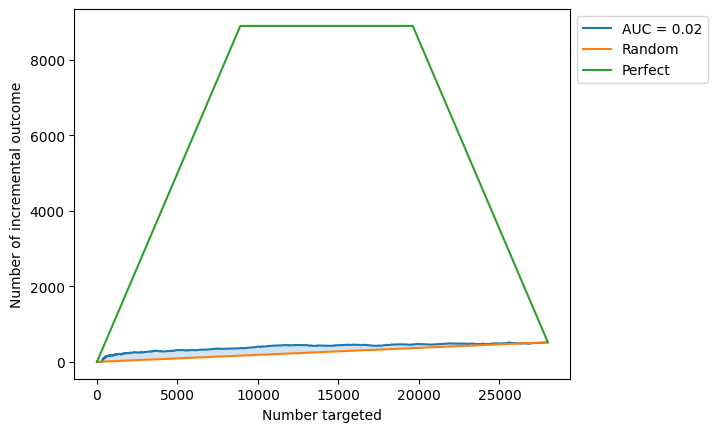

In [52]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [53]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.022958449731560138

## 2nd optimization round

In [54]:
estimator = XGBClassifier(random_state=8, 
                          use_label_encoder=False)

In [55]:
model = ClassTransformation(estimator = estimator)

In [56]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [57]:
params = {
    'estimator__n_estimators': [25, 50, 150],
    'estimator__learning_rate': [0.05, 0.1, 0.2],
    'estimator__max_depth': [1, 2, 3],
    'estimator__reg_alpha': [0, 0.05],
    'estimator__reg_lambda': [0, 0.05]
}

In [58]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [59]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[20:20:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.3s
[20:20:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.012 total time=   0.3s
[20:20:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   0.3s
[20:20:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.3s
[20:20:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.4s
[20:20:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.4s
[20:20:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.012 total time=   0.3s
[20:20:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.013 total time=   0.3s
[20:20:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.4s
[20:20:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.4s
[20:20:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.3s
[20:20:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.012 total time=   0.3s
[20:20:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.013 total time=   0.4s
[20:20:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.3s
[20:20:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.3s
[20:20:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.3s
[20:20:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.012 total time=   0.3s
[20:20:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.013 total time=   0.3s
[20:20:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.3s
[20:20:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.3s
[20:20:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:20:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.5s
[20:20:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   0.5s
[20:20:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.5s
[20:20:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:20:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:20:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.5s
[20:20:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.015 total time=   0.5s
[20:20:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.5s
[20:20:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:20:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:20:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.5s
[20:20:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.015 total time=   0.5s
[20:20:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.5s
[20:20:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:20:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.6s
[20:20:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.6s
[20:21:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.015 total time=   0.6s
[20:21:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.5s
[20:21:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:21:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.4s
[20:21:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[20:21:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.3s
[20:21:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.4s
[20:21:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[20:21:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s
[20:21:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[20:21:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   1.4s
[20:21:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[20:21:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[20:21:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.3s
[20:21:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.5s
[20:21:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   1.3s
[20:21:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.4s
[20:21:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[20:21:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s
[20:21:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[20:21:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   1.4s
[20:21:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.4s
[20:21:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.4s
[20:21:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:21:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:21:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.5s
[20:21:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.5s
[20:21:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:21:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:21:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:21:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.5s
[20:21:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.5s
[20:21:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:21:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:21:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:21:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.5s
[20:21:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:21:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:21:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:21:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.4s
[20:21:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.5s
[20:21:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:21:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:21:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:21:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:21:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[20:21:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[20:21:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:21:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[20:21:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:21:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.8s
[20:21:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[20:21:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[20:21:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[20:21:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:21:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[20:21:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[20:21:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:21:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[20:21:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:21:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.8s
[20:21:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[20:21:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[20:21:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:21:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[20:21:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.3s
[20:22:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   2.4s
[20:22:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:22:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   2.4s
[20:22:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   2.3s
[20:22:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[20:22:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:22:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.4s
[20:22:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[20:22:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[20:22:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.3s
[20:22:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[20:22:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:22:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:22:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   2.3s
[20:22:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[20:22:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.3s
[20:22:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:22:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.6s
[20:22:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.7s
[20:22:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[20:22:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[20:22:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[20:22:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[20:22:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.7s
[20:22:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.7s
[20:22:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[20:22:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[20:22:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.6s
[20:22:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.7s
[20:22:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.7s
[20:22:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[20:22:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[20:22:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.6s
[20:22:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[20:22:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.7s
[20:22:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[20:22:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[20:22:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.1s
[20:22:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   1.2s
[20:22:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[20:22:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[20:22:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[20:23:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[20:23:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[20:23:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:23:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:23:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[20:23:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[20:23:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[20:23:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[20:23:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[20:23:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[20:23:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[20:23:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[20:23:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[20:23:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[20:23:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:23:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   3.2s
[20:23:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   3.2s
[20:23:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   3.4s
[20:23:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:23:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   3.3s
[20:23:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   3.3s
[20:23:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   3.2s
[20:23:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   3.2s
[20:23:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   3.3s
[20:23:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   4.0s
[20:23:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   3.7s
[20:23:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   3.7s
[20:24:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   3.6s
[20:24:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.6s
[20:24:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   4.1s
[20:24:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   3.5s
[20:24:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   3.2s
[20:24:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.1s
[20:24:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.2s
[20:24:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.2s
[20:24:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.3s
[20:24:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.3s
[20:24:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   0.3s
[20:24:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.3s
[20:24:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.3s
[20:24:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.3s
[20:24:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.3s
[20:24:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.016 total time=   0.3s
[20:24:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.3s
[20:24:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.3s
[20:24:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.3s
[20:24:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.3s
[20:24:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.016 total time=   0.3s
[20:24:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.3s
[20:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.3s
[20:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.3s
[20:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.3s
[20:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.016 total time=   0.3s
[20:24:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.3s
[20:24:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.3s
[20:24:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:24:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:24:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.5s
[20:24:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:24:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:24:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:24:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:24:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.5s
[20:24:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:24:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:24:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:24:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:24:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.5s
[20:24:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:24:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:24:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:24:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:24:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.5s
[20:24:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:24:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:24:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[20:24:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:24:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.3s
[20:24:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:24:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[20:24:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:24:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[20:24:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   1.3s
[20:24:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[20:24:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[20:24:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.4s
[20:24:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:24:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   1.3s
[20:25:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:25:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.4s
[20:25:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[20:25:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[20:25:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   1.3s
[20:25:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[20:25:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.4s
[20:25:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:25:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:25:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.5s
[20:25:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:25:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:25:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:25:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:25:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.5s
[20:25:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:25:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:25:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:25:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.5s
[20:25:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.5s
[20:25:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:25:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:25:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:25:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.5s
[20:25:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.5s
[20:25:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:25:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:25:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[20:25:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[20:25:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[20:25:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:25:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[20:25:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:25:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[20:25:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[20:25:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[20:25:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:25:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[20:25:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[20:25:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[20:25:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:25:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:25:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:25:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[20:25:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[20:25:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:25:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[20:25:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   2.4s
[20:25:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:25:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   2.3s
[20:25:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[20:25:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:25:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   2.3s
[20:25:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:25:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   2.3s
[20:25:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   2.3s
[20:25:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:26:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   2.3s
[20:26:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   2.3s
[20:26:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[20:26:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   2.3s
[20:26:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   2.3s
[20:26:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.3s
[20:26:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[20:26:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.3s
[20:26:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[20:26:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[20:26:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.7s
[20:26:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.029 total time=   0.7s
[20:26:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[20:26:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[20:26:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[20:26:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.7s
[20:26:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.029 total time=   0.7s
[20:26:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.7s
[20:26:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[20:26:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[20:26:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.7s
[20:26:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.029 total time=   0.7s
[20:26:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.7s
[20:26:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[20:26:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.7s
[20:26:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[20:26:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.7s
[20:26:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.7s
[20:26:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[20:26:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.7s
[20:26:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.1s
[20:26:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[20:26:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[20:26:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[20:26:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[20:26:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.2s
[20:26:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[20:26:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:26:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:26:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[20:26:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[20:26:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.2s
[20:26:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[20:26:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[20:26:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[20:26:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[20:26:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[20:26:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[20:26:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[20:27:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[20:27:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   3.2s
[20:27:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   3.2s
[20:27:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:27:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   3.2s
[20:27:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   3.2s
[20:27:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   3.2s
[20:27:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   3.1s
[20:27:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   3.3s
[20:27:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   3.5s
[20:27:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   3.2s
[20:27:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   3.2s
[20:27:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   3.2s
[20:27:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:27:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:27:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   3.2s
[20:27:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   3.2s
[20:27:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   3.2s
[20:27:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.2s
[20:28:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.2s
[20:28:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   3.2s
[20:28:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.3s
[20:28:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[20:28:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.4s
[20:28:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.3s
[20:28:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.4s
[20:28:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[20:28:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.3s
[20:28:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.4s
[20:28:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.4s
[20:28:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.4s
[20:28:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[20:28:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[20:28:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.4s
[20:28:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.4s
[20:28:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.4s
[20:28:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[20:28:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.4s
[20:28:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.4s
[20:28:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.4s
[20:28:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.4s
[20:28:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:28:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.5s
[20:28:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   0.5s
[20:28:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:28:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:28:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:28:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:28:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.017 total time=   0.6s
[20:28:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:28:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:28:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:28:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.5s
[20:28:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.017 total time=   0.5s
[20:28:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:28:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:28:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:28:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:28:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.017 total time=   0.5s
[20:28:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.5s
[20:28:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:28:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[20:28:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:28:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   1.4s
[20:28:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:28:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[20:28:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[20:28:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[20:28:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   1.3s
[20:28:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[20:28:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.4s
[20:28:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[20:28:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:28:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   1.3s
[20:28:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[20:28:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.4s
[20:28:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.4s
[20:28:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[20:28:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   1.4s
[20:28:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[20:28:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[20:28:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:28:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:28:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:28:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.5s
[20:28:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.5s
[20:28:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.6s
[20:28:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:28:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[20:28:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:28:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:28:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.5s
[20:28:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.5s
[20:28:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[20:28:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.5s
[20:28:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.5s
[20:28:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.5s
[20:29:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:29:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.5s
[20:29:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.5s
[20:29:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.5s
[20:29:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:29:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:29:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[20:29:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:29:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[20:29:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[20:29:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[20:29:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[20:29:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[20:29:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.9s
[20:29:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[20:29:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[20:29:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.8s
[20:29:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[20:29:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[20:29:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[20:29:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[20:29:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[20:29:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[20:29:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[20:29:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[20:29:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[20:29:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   2.3s
[20:29:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   2.6s
[20:29:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.4s
[20:29:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.3s
[20:29:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   2.3s
[20:29:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   2.3s
[20:29:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   2.3s
[20:29:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[20:29:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[20:29:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[20:29:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   2.3s
[20:29:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   2.3s
[20:29:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[20:29:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[20:29:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.3s
[20:29:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.3s
[20:30:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   2.3s
[20:30:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[20:30:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.6s
[20:30:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.029 total time=   0.7s
[20:30:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[20:30:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[20:30:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[20:30:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[20:30:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:30:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   1.1s
[20:30:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.7s
[20:30:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.6s
[20:30:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[20:30:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.6s
[20:30:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[20:30:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[20:30:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[20:30:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.7s
[20:30:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.029 total time=   0.6s
[20:30:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.7s
[20:30:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.7s
[20:30:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[20:30:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.1s
[20:30:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[20:30:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:30:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   1.2s
[20:30:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[20:30:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[20:30:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:30:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.3s
[20:30:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[20:30:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s
[20:30:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[20:30:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:30:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[20:30:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   1.2s
[20:30:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[20:30:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[20:30:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[20:30:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.1s
[20:30:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[20:30:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s
[20:30:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:30:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   3.2s
[20:30:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   3.2s
[20:30:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   3.2s
[20:30:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   3.2s
[20:31:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   3.2s
[20:31:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.017 total time=   3.2s
[20:31:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.016 total time=   3.2s
[20:31:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.015 total time=   3.2s
[20:31:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.014 total time=   3.2s
[20:31:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:31:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.2s
[20:31:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.3s
[20:31:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.014 total time=   3.4s
[20:31:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.016 total time=   3.2s
[20:31:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.2s
[20:31:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   3.3s
[20:31:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.2s
[20:31:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.013 total time=   3.2s
[20:31:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=150, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.016 total time=   3.2s
[20:31:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 42min 6s, sys: 33.9 s, total: 42min 40s
Wall time: 11min 4s


In [60]:
grid_search.best_score_

0.02539403559071581

In [61]:
grid_search.best_params_

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 2,
 'estimator__n_estimators': 50,
 'estimator__reg_alpha': 0,
 'estimator__reg_lambda': 0.05}

### Validation results

In [62]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:33:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=2, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0, reg_lambda=0.05,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [63]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.04066348,  0.03768754, -0.00258255, ...,  0.00268269,
        0.04660082,  0.01457214], dtype=float32)

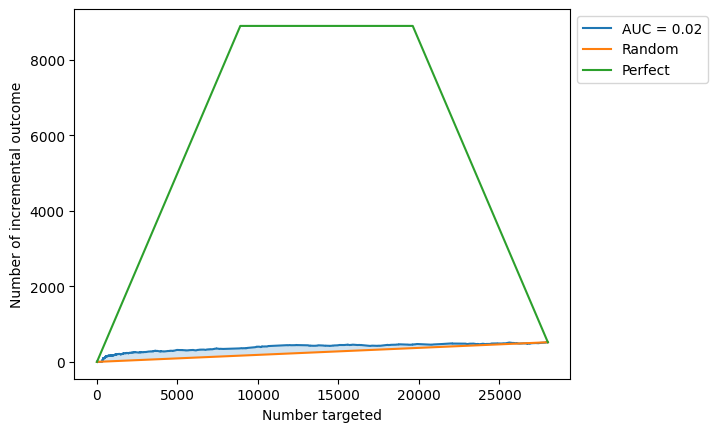

In [64]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [65]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.022845710055807916

# Feature importance

In [66]:
pd.DataFrame({'value':model.estimator.get_booster().get_score(importance_type='gain')})\
    .sort_values('value', ascending=False)

,value
first_redeem_date,94.213463
express_points_spent_sum,17.307549
express_points_spent_mean,16.939701
purchase_sum,12.261258
age,11.946851
first_issue_date,11.459245
purchase_mean,11.323089
regular_points_received_sum,10.872353
regular_points_spent_sum,9.179124
gender_F,7.205603


# Prediction on the test set

Training model on the full dataset

In [67]:
X_full = df_full.loc[:, x_cols]
X_full

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
ad6561e2d8,2.432500,97.3,0.000000,0.0,-1.600000,-64.0,0.000000,0.0,270.035250,10801.41,17503,17674,50.0,1,0,0
7c1ccbf93f,4.700000,9.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,425.500000,851.00,17480,17584,24.0,1,0,0
b58fadcab6,2.772727,91.5,0.000000,0.0,-9.363636,-309.0,0.000000,0.0,429.447576,14171.77,17472,17789,36.0,0,0,0
e99e6fabb9,1.046154,13.6,0.000000,0.0,0.000000,0.0,0.000000,0.0,220.923077,2872.00,17667,17681,79.0,1,0,0
27fb6f8520,2.740000,82.2,0.666667,20.0,-0.133333,-4.0,-1.666667,-50.0,329.540333,9886.21,17364,17515,34.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,8.625000,34.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,744.500000,2978.00,17835,17992,72.0,0,0,0
f634deea4e,1.086792,57.6,0.000000,0.0,-1.754717,-93.0,0.000000,0.0,199.038302,10549.03,17566,17602,35.0,0,0,0
16cb4f99b0,3.485714,24.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,448.571429,3140.00,17585,18047,50.0,1,0,0


In [68]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [69]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [70]:
model_full = ClassTransformation(estimator = estimator)

In [71]:
model_full.set_params(**grid_search.best_params_)

ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=2, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=50, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0, reg_lambda=0.05,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [72]:
%%time
model_full = model_full.fit(X_full, y_full, treat_full)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:41:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 4.51 s, sys: 48.1 ms, total: 4.56 s
Wall time: 1.19 s


Prediction

In [73]:
X_test = pd.read_csv('clients_test_modified.csv', index_col='client_id')
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0


In [74]:
y_pred_test = model_full.predict(X_test); y_pred_test

array([0.04969144, 0.1067003 , 0.04730463, ..., 0.02872813, 0.0413661 ,
       0.01658487], dtype=float32)

In [75]:
X_test['pred'] = y_pred_test
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem,pred
client_id,,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0,0.049691
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0,0.106700
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0,0.047305
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0,0.045497
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1,0.016590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0,0.050938
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0,0.496352
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0,0.028728


In [76]:
X_test.pred.to_csv('submit_all_features_param_select.csv')